# FastAI Transfer Learning

This approach is based on using the fastai libray, copying techniques used in Lesson1 of the fast.ai course 
- https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb

In [64]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [65]:
from fastai.vision import *
from fastai.metrics import error_rate

# Import Data

csv2png.js converts the CSV file into a ImageNet style diretory tree of images
which can be loaded into an ImageDataBunch for use with fastai

In [75]:
data = ImageDataBunch.from_folder('./data/images/', 
                                  test='test',
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(do_flip=False)
                     )\
                     .normalize(imagenet_stats)

In [76]:
data

ImageDataBunch;

Train: LabelList (33600 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,0,0,0,0
Path: data/images;

Valid: LabelList (8400 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,5,1,4,5
Path: data/images;

Test: LabelList (28000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: EmptyLabelList
,,,,
Path: data/images

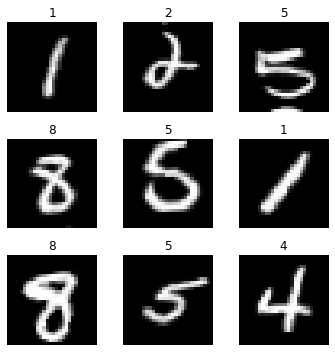

In [77]:
data.show_batch(rows=3, figsize=(5,5))

# Pretrained Neural Networks

There are several pretrained models to choose from: https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

- resnet18
- resnet34
- resnet50
- resnet101
- resnet152
- resnext50_32x4d
- resnext101_32x8d
- wide_resnet50_2
- wide_resnet101_2


## Establish Baseline: resnet18

Lets start with the smallest network on the list and get some baseline results

In [80]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jamie/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:36<00:00, 1.29MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.634910,0.530181,0.829048,02:56
1,0.394097,0.257756,0.918333,02:46


In [81]:
learn.save('resnet18');

In [89]:
def write_csv_predictions(csv_file, learn):
    predictions, *_ = learn.get_preds(DatasetType.Test)
    labels        = np.argmax(predictions, 1)
    submission_df = pd.DataFrame({'ImageId': list(range(1,len(labels)+1)), 'Label': labels})
    submission_df.to_csv(csv_file, index=False)

In [90]:
write_csv_predictions('./submissions/fastai-resnet18-fit2.csv', learn)

### Submit to Kaggle
```
kaggle competitions submit -c digit-recognizer -f ./submissions/fastai-resnet18-fit2.csv -m "fastai: resnet18 + fit(2)"
```

Score: 0.09371 | Rank: 2509/2521

This establishes a baseline score we can attempt to beat